## Using Guardian Media API to extract Information

In [6]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
from datetime import datetime
srilanka_tz = pytz.timezone('Asia/Colombo')
today_date=datetime.now(srilanka_tz).strftime("%Y-%m-%d")
today_date

'2022-07-08'

In [7]:
def get_page(page_num):
    response = requests.get("https://content.guardianapis.com/search?q=%22justin%20trudeau%22&from-date=2018-01-01", params={"api-key": "3cc2995b-1ebf-48a7-aff2-1ff472dd4a73", "page": page_num })
    data = response.json()
    return pd.json_normalize(data['response']['results'])


response1 = requests.get("https://content.guardianapis.com/search?q=%22justin%20trudeau%22&from-date=2018-01-01", params={"api-key": "3cc2995b-1ebf-48a7-aff2-1ff472dd4a73", })
data1 = response1.json()
no_of_pages=data1['response']['pages']
print(f" Number of Pages= {no_of_pages}")

#Get all pages as dataframes
pages=[get_page(n+1) for n in range(no_of_pages)]

#combine all pages to one dataframe

df=pd.concat(pages)

 Number of Pages= 116


In [8]:
df.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
0,world/2022/mar/22/justin-trudeau-power-sharing...,article,world,World news,2022-03-22T14:50:39Z,Justin Trudeau strikes power-sharing deal with...,https://www.theguardian.com/world/2022/mar/22/...,https://content.guardianapis.com/world/2022/ma...,False,pillar/news,News
1,technology/2022/feb/17/elon-musk-criticised-fo...,article,technology,Technology,2022-02-17T19:19:56Z,Elon Musk criticised for likening Justin Trude...,https://www.theguardian.com/technology/2022/fe...,https://content.guardianapis.com/technology/20...,False,pillar/news,News
2,world/2022/jun/27/show-them-our-pecs-g7-leader...,article,world,World news,2022-06-27T03:03:06Z,‘Show them our pecs’: G7 leaders mock Putin’s ...,https://www.theguardian.com/world/2022/jun/27/...,https://content.guardianapis.com/world/2022/ju...,False,pillar/news,News
3,world/2021/oct/26/canada-cabinet-reshuffle-mel...,article,world,World news,2021-10-26T16:50:47Z,Justin Trudeau names women to top posts in Can...,https://www.theguardian.com/world/2021/oct/26/...,https://content.guardianapis.com/world/2021/oc...,False,pillar/news,News
4,world/2022/may/31/handgun-freeze-in-canada-and...,article,world,World news,2022-05-31T11:22:40Z,Canada plans complete freeze on handgun ownership,https://www.theguardian.com/world/2022/may/31/...,https://content.guardianapis.com/world/2022/ma...,False,pillar/news,News


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1158 entries, 0 to 7
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  1158 non-null   object
 1   type                1158 non-null   object
 2   sectionId           1158 non-null   object
 3   sectionName         1158 non-null   object
 4   webPublicationDate  1158 non-null   object
 5   webTitle            1158 non-null   object
 6   webUrl              1158 non-null   object
 7   apiUrl              1158 non-null   object
 8   isHosted            1158 non-null   bool  
 9   pillarId            1153 non-null   object
 10  pillarName          1153 non-null   object
dtypes: bool(1), object(10)
memory usage: 100.6+ KB


### Count how many articles about Justin Trudeau have been posted since 01.01.2018 until today

In [10]:
#convert webPublicationDate to datetime64 type
df['webPublicationDate']=pd.to_datetime(df['webPublicationDate'])
#convert webPublicationDate to "%Y-%m-%d" format
df['webPublicationDate']=df['webPublicationDate'].dt.strftime("%Y-%m-%d")

In [11]:
df_output=pd.DataFrame(df.groupby(['webPublicationDate']).size())

In [12]:
idx=pd.date_range('2018-01-01',today_date)

In [13]:
df_output.index=pd.DatetimeIndex(df_output.index)
#fill missing dates between 2018-01-01 until today with zeros
df_final=df_output.reindex(idx,fill_value=0)

In [14]:
df_final = df_final.reset_index(level=0)
df_final.columns = ['Date', 'numberofarticles']

In [15]:
df_final.to_csv('daily_no_of_articles.csv',index=False)
print(df_final)

           Date  numberofarticles
0    2018-01-01                 2
1    2018-01-02                 0
2    2018-01-03                 1
3    2018-01-04                 0
4    2018-01-05                 0
...         ...               ...
1645 2022-07-04                 0
1646 2022-07-05                 2
1647 2022-07-06                 0
1648 2022-07-07                 0
1649 2022-07-08                 0

[1650 rows x 2 columns]


### Average of all days

In [16]:
avg=df_final['numberofarticles'].mean()
print(f'average no.of articles from period 2018-01-01 to {today_date} is {avg}')

average no.of articles from period 2018-01-01 to 2022-07-08 is 0.7018181818181818


### Section with most articles written

In [17]:
most_section=df['sectionName'].mode()
print(f'section with most articles written is {most_section[0]}')

section with most articles written is World news


### Plot no.of articles

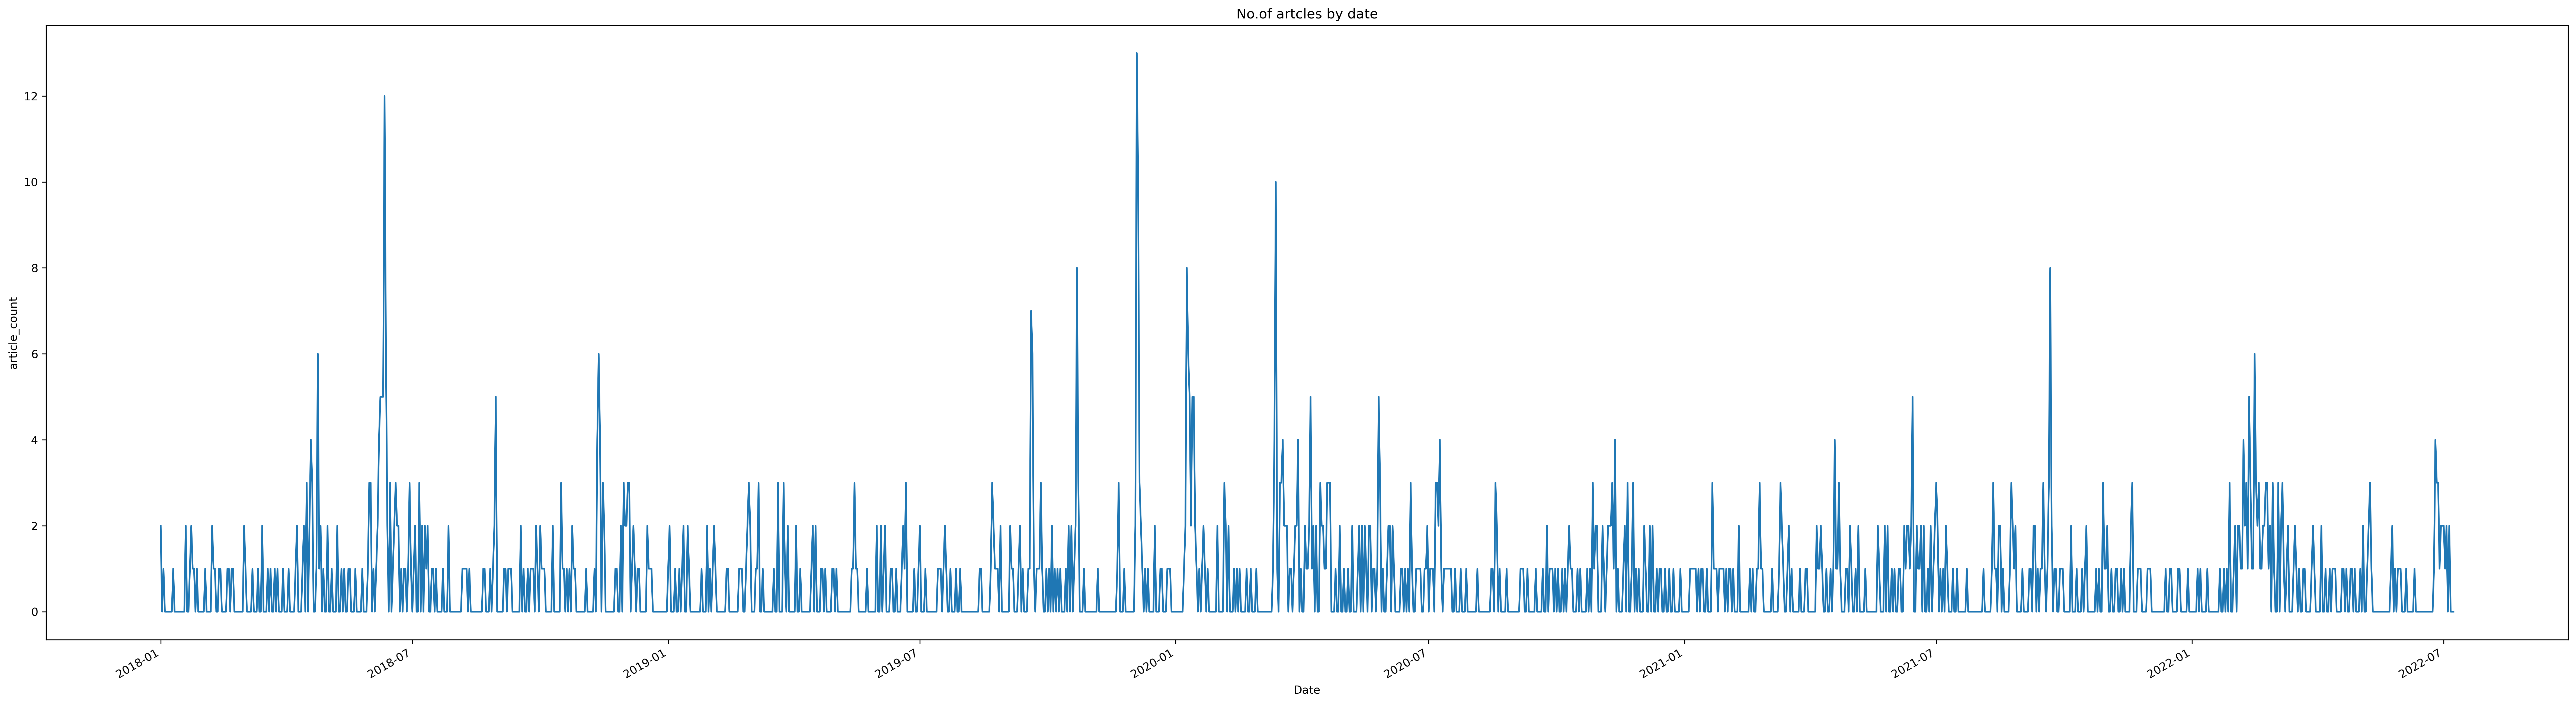

In [18]:
# from matplotlib.pyplot import figure
# figure(figsize(20,30),dpi=80)
plt.rcParams["figure.figsize"] = (40,10)
plt.rcParams["figure.dpi"] = 300
plt.plot(df_final.Date,df_final.numberofarticles)
plt.title('No.of artcles by date')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Date')
plt.ylabel('article_count')
plt.savefig("output.jpg")

We can observe some unusual events in the timeseries that deviates from normal behavior.

When observe the daily time-series plot there are some outlier data points that are unusual(spikes) which shows high article counts and dont follow the expected normal dataset pattern of having daily article count majority with no articles or articles ranging from 1 to a max of 6.
It seems there are few controversial incidents has happended to Trudeau to increase the artcle count abnormally when compared to normal non-contraversioal politics days.


When look at the unusual datapoints , 2018-06-11 shows 12 articles with information regarding Justin Trudeau.because of the mass media attraction he recieved due to G7 summit finale and fight with President Trump on trade threats.Another unusual event on dec-2020 which involves Donald Trump cancelling Nato summit conference and Trudeau mocking trump at Nato summit has documented on articles on 2020-12-04 and 2020-12-05 making it a controversial subject matter.Another breaking news on 2020-03-13 where Trudeau addressed the nation from isolation regarding government steps to tackle corona-virus has made the article counts high from the normal behaviour.


## Daily automated job to send details.

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
import time
import os
from datetime import datetime
srilanka_tz = pytz.timezone('Asia/Colombo')


# Import modules
import smtplib, ssl
## email.mime subclasses
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from apscheduler.schedulers.background import BackgroundScheduler



In [ ]:
def automate_mail():
    # Define the HTML document
    html = '''
        <html>
            <body>
                <p>Hello, welcome to your report!</p>
            </body>
        </html>
        '''
    # Define a function to plot and save output.jpg
    ##############################################################

    
    today_date=datetime.now(srilanka_tz).strftime("%Y-%m-%d")

    def get_page(page_num):
        response = requests.get("https://content.guardianapis.com/search?q=%22justin%20trudeau%22&from-date=2018-01-01", params={"api-key": "3cc2995b-1ebf-48a7-aff2-1ff472dd4a73", "page": page_num })
        data = response.json()
        return pd.json_normalize(data['response']['results'])


    response1 = requests.get("https://content.guardianapis.com/search?q=%22justin%20trudeau%22&from-date=2018-01-01", params={"api-key": "3cc2995b-1ebf-48a7-aff2-1ff472dd4a73", })
    data1 = response1.json()
    no_of_pages=data1['response']['pages']
    

    #Get all pages as dataframes
    pages=[get_page(n+1) for n in range(no_of_pages)]

    #combine all pages to one dataframe

    df=pd.concat(pages)


    #convert webPublicationDate to datetime64 type
    df['webPublicationDate']=pd.to_datetime(df['webPublicationDate'])
    #convert webPublicationDate to "%Y-%m-%d" format
    df['webPublicationDate']=df['webPublicationDate'].dt.strftime("%Y-%m-%d")

    df_output=pd.DataFrame(df.groupby(['webPublicationDate']).size())
    idx=pd.date_range('2018-01-01',today_date)

    df_output.index=pd.DatetimeIndex(df_output.index)
    #fill missing dates between 2018-01-01 until today with zeros
    df_final=df_output.reindex(idx,fill_value=0)

    df_final = df_final.reset_index(level=0)
    df_final.columns = ['Date', 'numberofarticles']

    plt.rcParams["figure.figsize"] = (40,10)
    plt.rcParams["figure.dpi"] = 300
    plt.plot(df_final.Date,df_final.numberofarticles)
    plt.title('No.of artcles by date')
    plt.xticks(rotation=30, ha='right')
    plt.xlabel('Date')
    plt.ylabel('article_count')
    plt.savefig("output.jpg")

    
    
    # Define a function to attach files as MIMEApplication to the email
    ##############################################################
    def attach_file_to_email(email_message, filename):
        # Open the attachment file for reading in binary mode, and make it a MIMEApplication class
        with open(filename, "rb") as f:
            file_attachment = MIMEApplication(f.read())
        # Add header/name to the attachments    
        file_attachment.add_header(
            "Content-Disposition",
            f"attachment; filename= {filename}",
        )
        # Attach the file to the message
        email_message.attach(file_attachment)
    ##############################################################    

    # Set up the email addresses and password. Please replace below with your email address and password
    email_from = 'xxxx@gmail.com'  #add senders email
    password = 'xxxxx' #add password 
    ## Add multiple recipients as a list
    ##############################################################
    email_to = ['yyyy@gmail.com', 'zzzz@gmail.com'] #add recipient email list


    # Create a MIMEMultipart class, and set up the From, To, Subject fields
    email_message = MIMEMultipart()
    email_message['From'] = email_from
    email_message['To'] = ','.join(email_to)
    email_message['Subject'] = f'Daily article count of Justin Trudeau - {today_date}'

    # Attach the html doc defined earlier, as a MIMEText html content type to the MIME message
    email_message.attach(MIMEText(html, "html"))

    # Attach jpg
    ##############################################################
    attach_file_to_email(email_message, 'output.jpg')
    ##############################################################
    # Convert it as a string
    email_string = email_message.as_string()

    # Connect to the Gmail SMTP server and Send Email
    context = ssl.create_default_context()
    with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as server:
        server.login(email_from, password)
        server.sendmail(email_from, email_to, email_string) 



if __name__ == '__main__':
    scheduler = BackgroundScheduler()
    scheduler.add_job(automate_mail, 'interval', hours=24)
    scheduler.start()
    print('Press Ctrl+{0} to exit'.format('Break' if os.name == 'nt' else 'C'))

    try:
        # This is here to simulate application activity (which keeps the main thread alive).
        while True:
            time.sleep(2)
    except (KeyboardInterrupt, SystemExit):
        # Not strictly necessary if daemonic mode is enabled but should be done if possible
        scheduler.shutdown()

Press Ctrl+C to exit
